<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Analise-Bayesiana/blob/main/Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 2 Trabalho – Processos Estocásticos



1) Os dados abaixo foram extraídos do Site do DATASUS – com relação ao número de
casos de Aids no Brasil de 2001 a 2009. Os dados estão distribuídos em:
a) Total no Brasil
b) Total no Brasil (separado por sexo Feminino e Masculino)
c) Total em São Paulo
d) Total em São Paulo (separados por sexo: Feminino e Masculino)
e) Total de casos de Aids no Rio de Janeiro
f) Total de casos de Aids no Rio de Janeiro (separados por sexo Masc. e Fem.)

In [ ]:
# Criando a base de dados com os dados fornecidos
dados <- data.frame(
  Ano = c(2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001),
  soma_Brasil = c(191481045, 189612814, 189335191, 186770560, 184184264, 181586030, 176871437, 174632960, 172381455),
  Feminino = c(97430444, 96453502, 96293080, 94954834, 93679912, 92334905, 89871896, 88735474, 87569890),
  Masculino = c(94050601, 93159312, 93042111, 91815726, 90504352, 89251125, 86999541, 85897486, 84811565),
  sao_paulo = c(41384089, 41011635, 41663568, 41055735, 40442795, 39827022, 38709320, 38177742, 37645298),
  feminino_sp = c(21239073, 21033978, 21351021, 20989010, 20723077, 20392848, 19793451, 19508378, 19222839),
  masculino_sp = c(20145016, 19977657, 20312547, 20066725, 19719718, 19434174, 18915869, 18669364, 18422459),
  rio_de_janeiro = c(16010386, 15872362, 15738536, 15561721, 15383407, 15204272, 14879118, 14724475, 14569580),
  feminino_rj = c(8353084, 8278005, 8207201, 8107776, 8030921, 7933497, 7756659, 7672556, 7588315),
  masculino_rj = c(7657302, 7594357, 7531335, 7453945, 7352486, 7270775, 7122459, 7051919, 6981265)
)

# Exibindo a base de dados criada
dados


Ano,soma_Brasil,Feminino,Masculino,sao_paulo,feminino_sp,masculino_sp,rio_de_janeiro,feminino_rj,masculino_rj
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,191481045,97430444,94050601,41384089,21239073,20145016,16010386,8353084,7657302
2008,189612814,96453502,93159312,41011635,21033978,19977657,15872362,8278005,7594357
2007,189335191,96293080,93042111,41663568,21351021,20312547,15738536,8207201,7531335
2006,186770560,94954834,91815726,41055735,20989010,20066725,15561721,8107776,7453945
2005,184184264,93679912,90504352,40442795,20723077,19719718,15383407,8030921,7352486
2004,181586030,92334905,89251125,39827022,20392848,19434174,15204272,7933497,7270775
2003,176871437,89871896,86999541,38709320,19793451,18915869,14879118,7756659,7122459
2002,174632960,88735474,85897486,38177742,19508378,18669364,14724475,7672556,7051919
2001,172381455,87569890,84811565,37645298,19222839,18422459,14569580,7588315,6981265


a) Gráficos de dispersão destes dados → verifiquem se os dados estão crescendo
ou decrescendo (tanto em São Paulo, Rio de Janeiro e Brasil)

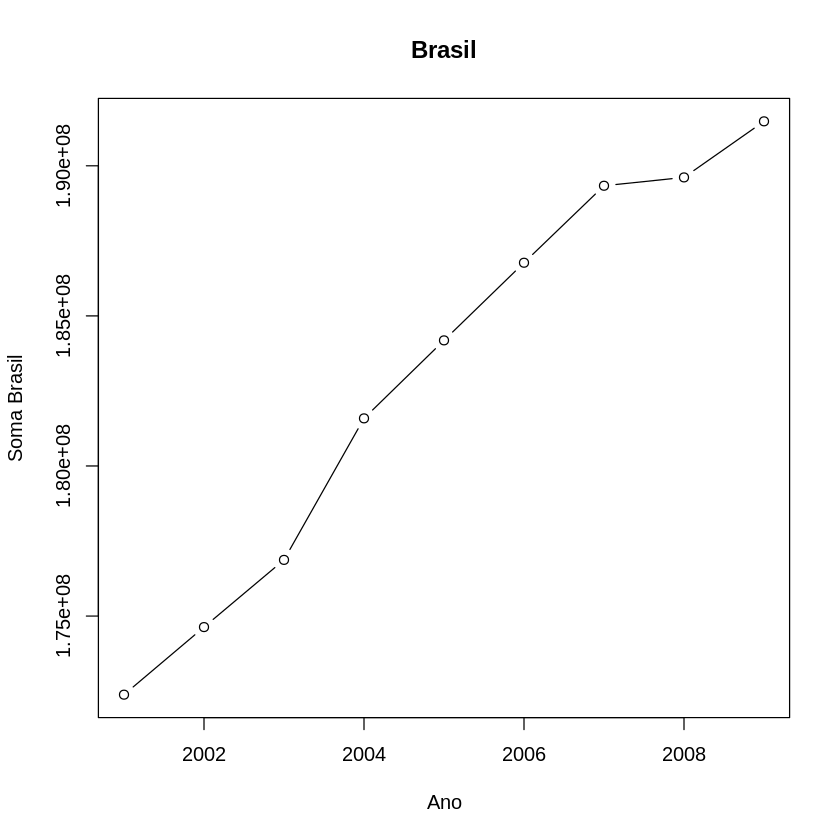

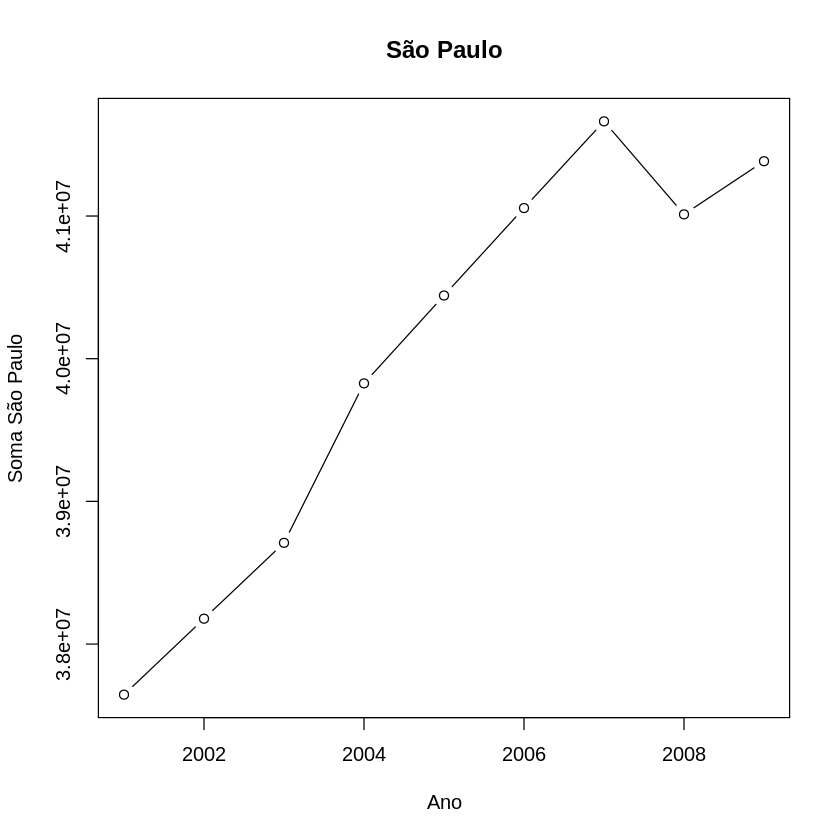

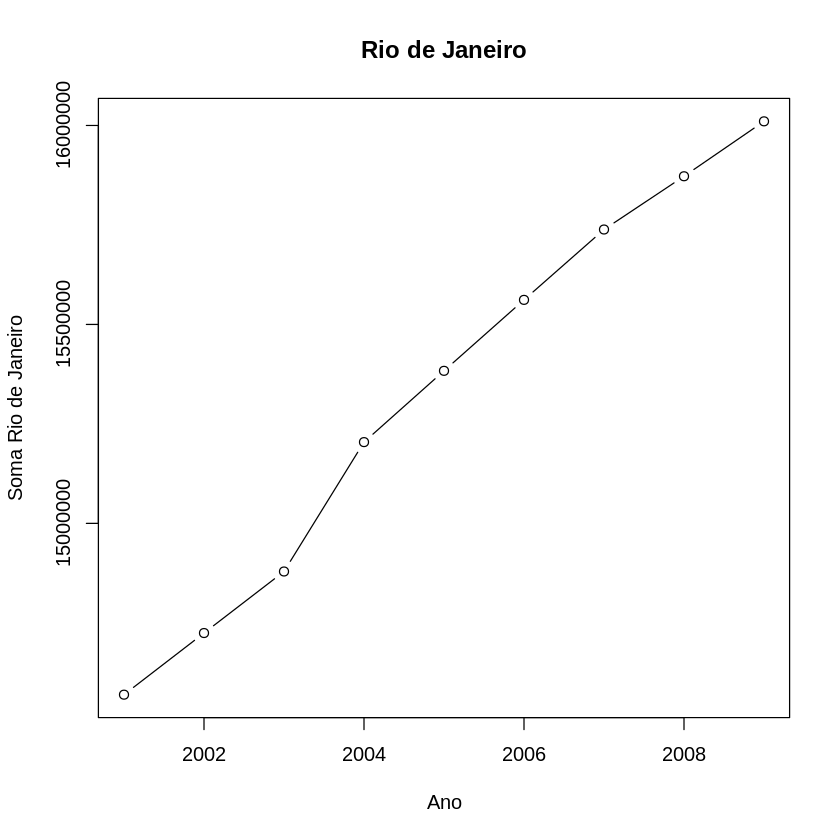

In [ ]:
# Gráfico de dispersão para Brasil
plot(dados$Ano, dados$soma_Brasil, main = "Brasil", type = "b", xlab = "Ano", ylab = "Soma Brasil")

# Gráfico de dispersão para São Paulo
plot(dados$Ano, dados$sao_paulo, main = "São Paulo", type = "b", xlab = "Ano", ylab = "Soma São Paulo")

# Gráfico de dispersão para Rio de Janeiro
plot(dados$Ano, dados$rio_de_janeiro, main ="Rio de Janeiro", type = "b", xlab = "Ano", ylab = "Soma Rio de Janeiro")


# b) Faça a separação dos dados por sexo: veja se há crescimento ou decrescimento destes valores com o aumento dos anos.

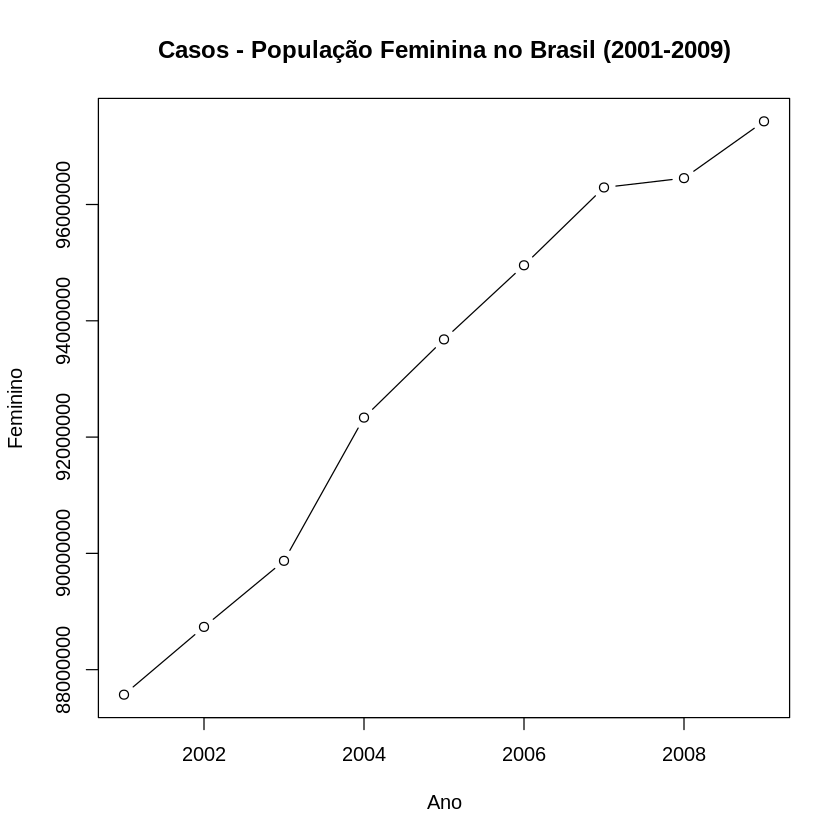

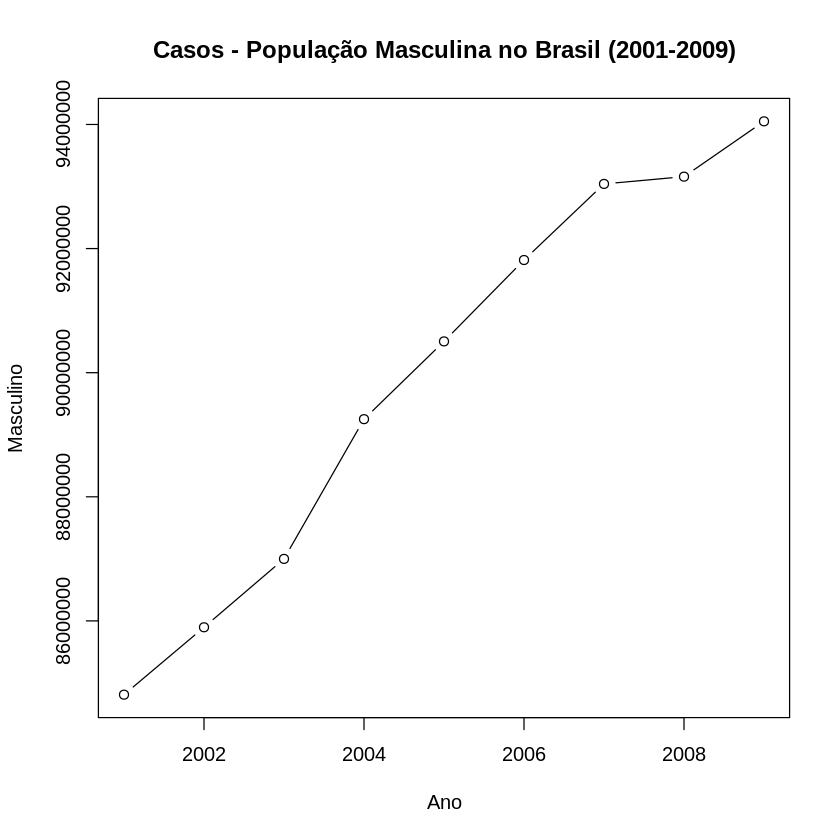

In [ ]:
# Gráfico de dispersão para Brasil - Feminino e Masculino
options(scipen = 999)
plot(dados$Ano, dados$Feminino, type = "b", xlab = "Ano", ylab = "Feminino", main = "Casos - População Feminina no Brasil (2001-2009)")
plot(dados$Ano, dados$Masculino, type = "b", xlab = "Ano", ylab = "Masculino", main = "Casos - População Masculina no Brasil (2001-2009)")


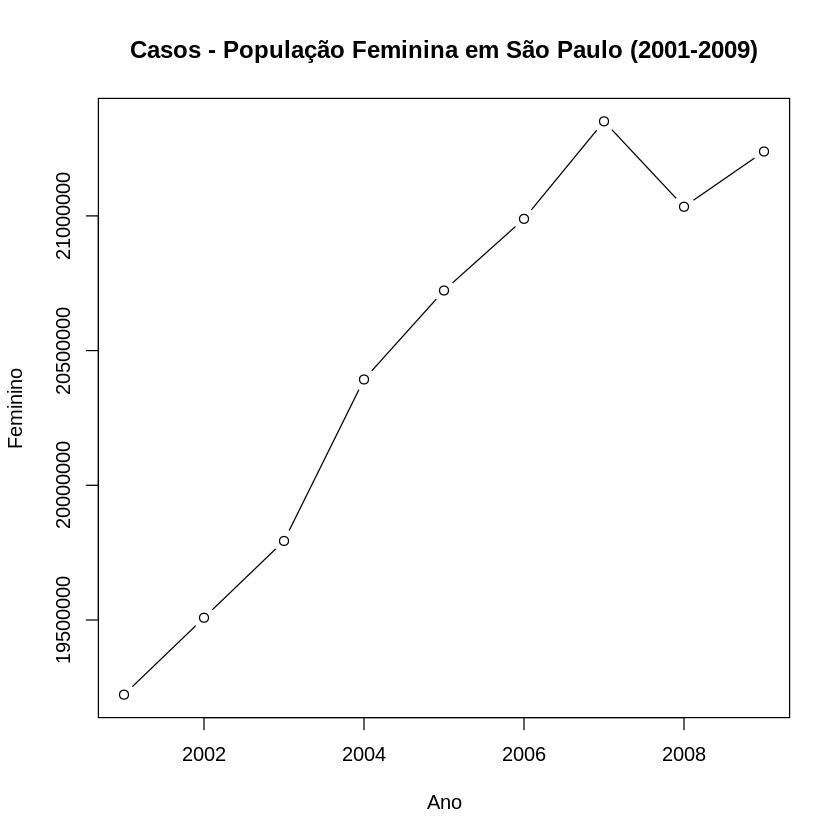

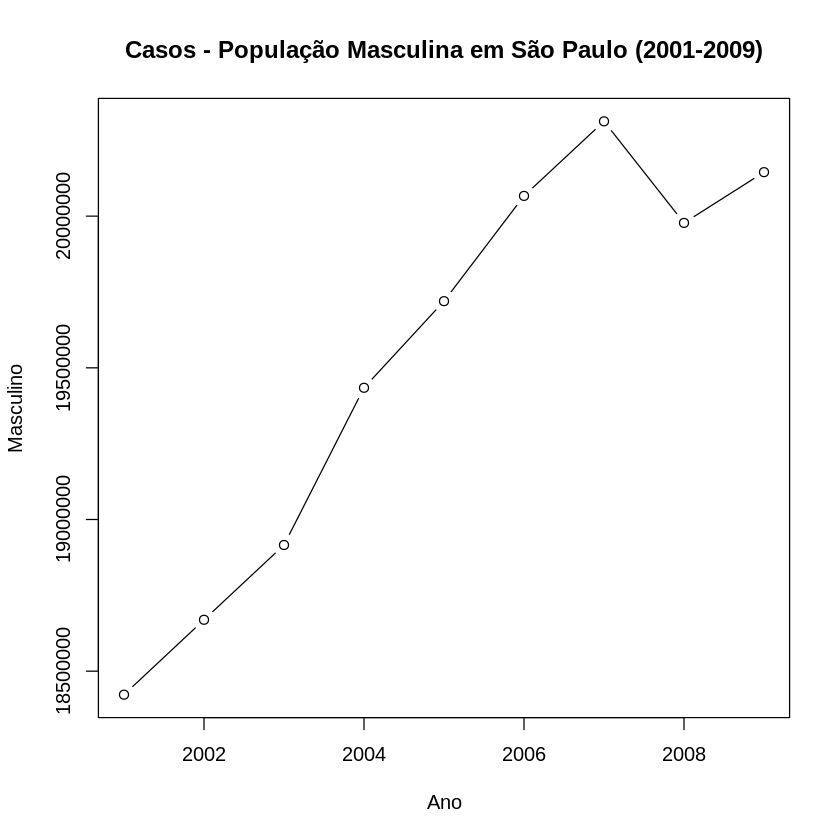

In [ ]:
# Gráfico de dispersão para São Paulo - Feminino
plot(dados$Ano, dados$feminino_sp, type = "b", xlab = "Ano", ylab = "Feminino", main = "Casos - População Feminina em São Paulo (2001-2009)")
# Gráfico de dispersão para São Paulo - Masculino
plot(dados$Ano, dados$masculino_sp, type = "b", xlab = "Ano", ylab = "Masculino", main = "Casos - População Masculina em São Paulo (2001-2009)")



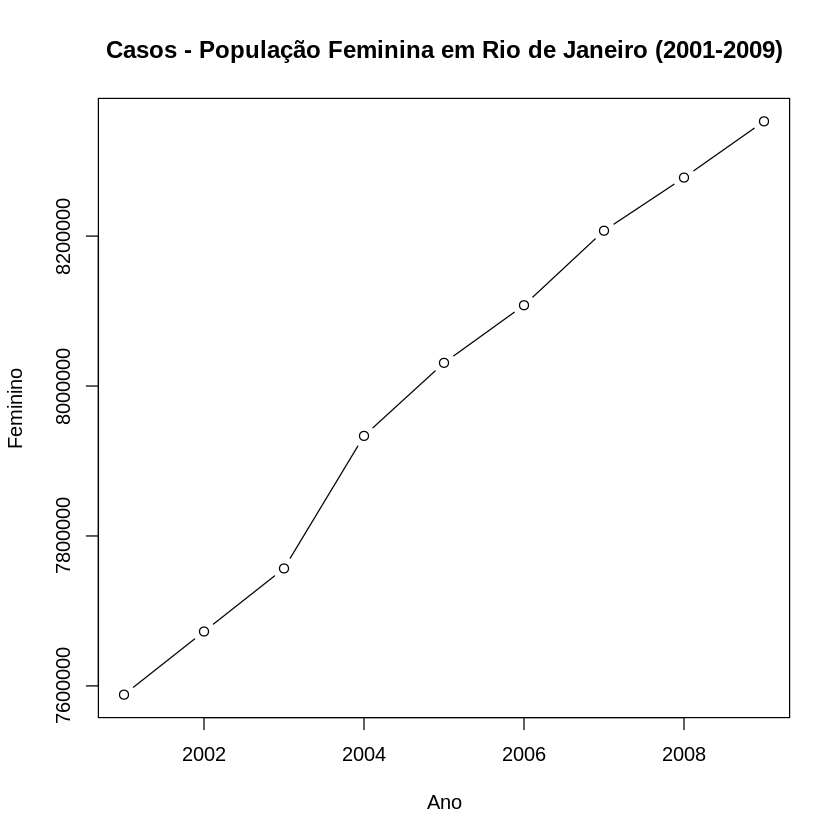

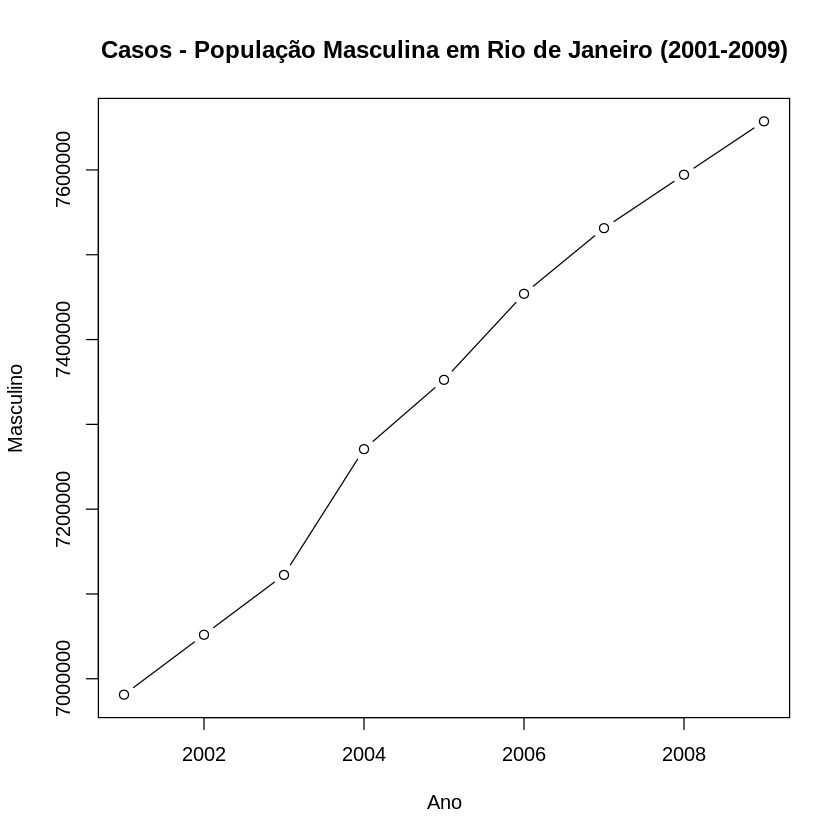

In [ ]:
# Gráfico de dispersão para São Paulo - Feminino
plot(dados$Ano, dados$feminino_rj, type = "b", xlab = "Ano", ylab = "Feminino", main = "Casos - População Feminina em Rio de Janeiro (2001-2009)")
# Gráfico de dispersão para São Paulo - Masculino
plot(dados$Ano, dados$masculino_rj, type = "b", xlab = "Ano", ylab = "Masculino", main = "Casos - População Masculina em Rio de Janeiro (2001-2009)")


c) Calcule a porcentagem dos casos em SP em relação ao Brasil → qual a
porcentagem de casos em SP em relação ao Brasil. (faça no total e por sexo
(feminino e masculino)). Faça um comparativo → veja se o crescimento está
maior entre as mulheres ou entre os homens.

In [ ]:
# calcular a porcentagem dos casos em SP em relação ao Brasil
porcentagem_sp_total <- (dados$sao_paulo / dados$soma_Brasil) * 100


# Tabela pelo Total

In [ ]:
# criação da tabela pelo total
tabela <- data.frame(Ano = dados$Ano, `Casos em SP` = dados$sao_paulo,
`Casos no Brasil` = dados$soma_Brasil, `Porcentagem em SP` = porcentagem_sp_total)
row.names(tabela) <- NULL

# impressão da tabela
print(tabela)

   Ano Casos.em.SP Casos.no.Brasil Porcentagem.em.SP
1 2009    41384089       191481045          21.61263
2 2008    41011635       189612814          21.62915
3 2007    41663568       189335191          22.00519
4 2006    41055735       186770560          21.98191
5 2005    40442795       184184264          21.95779
6 2004    39827022       181586030          21.93287
7 2003    38709320       176871437          21.88557
8 2002    38177742       174632960          21.86170
9 2001    37645298       172381455          21.83837


# Tabela por sexo (feminino e masculino)





In [ ]:
# calcular a porcentagem dos casos feninonos em SP em relação ao Brasil
porcentagem_feminino_sp <- (dados$feminino_sp / dados$soma_Brasil) * 100
porcentagem_feminino_sp

In [ ]:
# criação da tabela de casos femininos em relação a São Paulo
tabela <- data.frame(Ano = dados$Ano, `Feminio SP` = dados$feminino_sp, 
`Casos no Brasil` = dados$soma_Brasil, `Porcentagem Feminino em SP` = porcentagem_feminino_sp)
row.names(tabela) <- NULL

# impressão da tabela
print(tabela)

   Ano Feminio.SP Casos.no.Brasil Porcentagem.Feminino.em.SP
1 2009   21239073       191481045                   11.09200
2 2008   21033978       189612814                   11.09312
3 2007   21351021       189335191                   11.27684
4 2006   20989010       186770560                   11.23786
5 2005   20723077       184184264                   11.25127
6 2004   20392848       181586030                   11.23041
7 2003   19793451       176871437                   11.19087
8 2002   19508378       174632960                   11.17107
9 2001   19222839       172381455                   11.15134


In [ ]:
# calcular a porcentagem dos casos masculinos em SP em relação ao Brasil
porcentagem_marculinos_sp <- (dados$masculino_sp / dados$soma_Brasil) * 100
porcentagem_marculinos_sp 



In [ ]:
# criação da tabela pelo total
tabela <- data.frame(Ano = dados$Ano, `Masculino SP` = dados$masculino_sp, 
`Casos no Brasil` = dados$soma_Brasil, `Porcentagem Masculino em SP` = porcentagem_marculinos_sp)
row.names(tabela) <- NULL

# impressão da tabela
print(tabela)


   Ano Masculino.SP Casos.no.Brasil Porcentagem.Masculino.em.SP
1 2009     20145016       191481045                    10.52063
2 2008     19977657       189612814                    10.53603
3 2007     20312547       189335191                    10.72835
4 2006     20066725       186770560                    10.74405
5 2005     19719718       184184264                    10.70652
6 2004     19434174       181586030                    10.70246
7 2003     18915869       176871437                    10.69470
8 2002     18669364       174632960                    10.69063
9 2001     18422459       172381455                    10.68703


# Faça um comparativo → veja se o crescimento está maior entre as mulheres ou entre os homens.

In [ ]:
# Vetor com anos
anos <- dados$Ano


In [ ]:
# Vetor com casos masculinos em cada ano
casos_masculinos <- dados$masculino_sp



In [ ]:
# Vetor com casos femininos em cada ano
casos_femininos <- dados$feminino_sp



In [ ]:
# Tabela com as informações
tabela_crescimento <- data.frame(Ano = anos,
                                 Casos_Masculinos = casos_masculinos,
                                 Casos_Femininos = casos_femininos)



In [ ]:
# Coluna com o crescimento percentual entre um ano e outro para homens
tabela_crescimento$Crescimento_Masculino <- c(NA,
 diff(tabela_crescimento$Casos_Masculinos)/tabela_crescimento$Casos_Masculinos[-length(tabela_crescimento$Casos_Masculinos)]*100)



In [ ]:
#Coluna com o crescimento percentual entre um ano e outro para mulheres
tabela_crescimento$Crescimento_Feminino <- c(NA, 
diff(tabela_crescimento$Casos_Femininos)/tabela_crescimento$Casos_Femininos[-length(tabela_crescimento$Casos_Femininos)]*100)

# Tabela
tabela_crescimento

Ano,Casos_Masculinos,Casos_Femininos,Crescimento_Masculino,Crescimento_Feminino
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,20145016,21239073,NA,NA
2008,19977657,21033978,-0.8307712,-0.9656495
2007,20312547,21351021,1.6763227,1.5072898
2006,20066725,20989010,-1.2101978,-1.6955208
2005,19719718,20723077,-1.7292657,-1.2670107
2004,19434174,20392848,-1.4480126,-1.5935327
2003,18915869,19793451,-2.6669773,-2.9392511
2002,18669364,19508378,-1.3031651,-1.4402390
2001,18422459,19222839,-1.3225143,-1.4636737


# Gráfico comparando as variáveis Crescimento Masculino e Crescimento Feminino

In [ ]:
library(ggplot2)
library(dplyr)

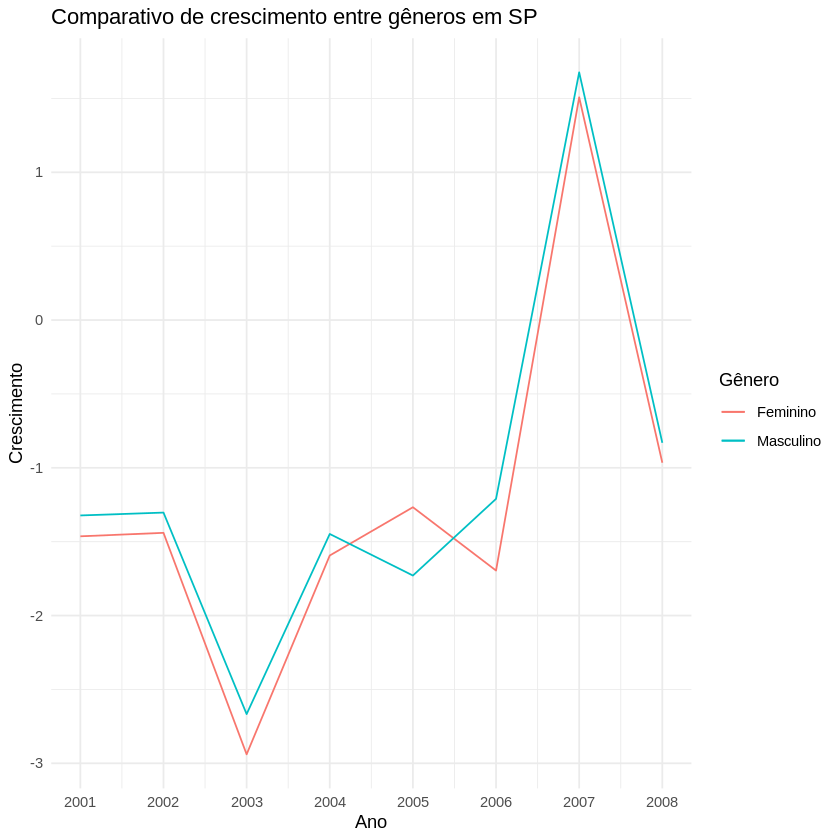

In [ ]:
# Filtrando os dados até 2008
dados_filtrados <- filter(tabela_crescimento, Ano <= 2008)

# Criando o gráfico
ggplot(dados_filtrados, aes(x = Ano, y = Crescimento_Feminino, color = "Feminino")) +
  geom_line() +
  geom_line(aes(y = Crescimento_Masculino, color = "Masculino")) +
  scale_x_continuous(limits = c(2001, 2008), breaks = seq(2001, 2008, 1)) +
  labs(title = "Comparativo de crescimento entre gêneros em SP",
       x = "Ano",
       y = "Crescimento",
       color = "Gênero") +
  theme_minimal()


d) Calcule a porcentagem dos casos em RJ em relação ao Brasil → qual a
porcentagem de casos em RJ em relação ao Brasil. (faça no total e por sexo
(feminino e masculino)). Faça um comparativo → veja se o crescimento está
maior entre as mulheres ou entre os homens

In [ ]:
#Calcule a porcentagem dos casos em RJ em relação ao Brasi.
#Qual a porcentagem de casos em RJ em relação ao Brasil.
porcentagens <- data.frame(
  Ano = dados$Ano,
    `Porcentagem no RJ` = round((dados$rio_de_janeiro / dados$soma_Brasil) * 100,2)
)

porcentagens


Ano,Porcentagem.no.RJ
<dbl>,<dbl>
2009,8.36
2008,8.37
2007,8.31
2006,8.33
2005,8.35
2004,8.37
2003,8.41
2002,8.43
2001,8.45


In [ ]:
porcentagem_rj_total <- (dados$rio_de_janeiro / dados$soma_Brasil) * 100
porcentagem_rj_total

[1] 8.361343 8.370933 8.312525 8.331999 8.352183 8.373041 8.412392 8.431670
[9] 8.451942

In [ ]:
# veja se o crescimento está maior entre as mulheres ou entre os homens
porcentagens_rj <- data.frame(
  Ano = dados$Ano,
  `Porcentagem feminina no RJ` = round((dados$feminino_rj / dados$soma_Brasil) * 100, 2),
  `Porcentagem masculina no RJ` = round((dados$masculino_rj / dados$soma_Brasil) * 100, 2)
)

porcentagens_rj


Ano,Porcentagem.feminina.no.RJ,Porcentagem.masculina.no.RJ
<dbl>,<dbl>,<dbl>
2009,4.36,4.00
2008,4.37,4.01
2007,4.33,3.98
2006,4.34,3.99
2005,4.36,3.99
2004,4.37,4.00
2003,4.39,4.03
2002,4.39,4.04
2001,4.40,4.05


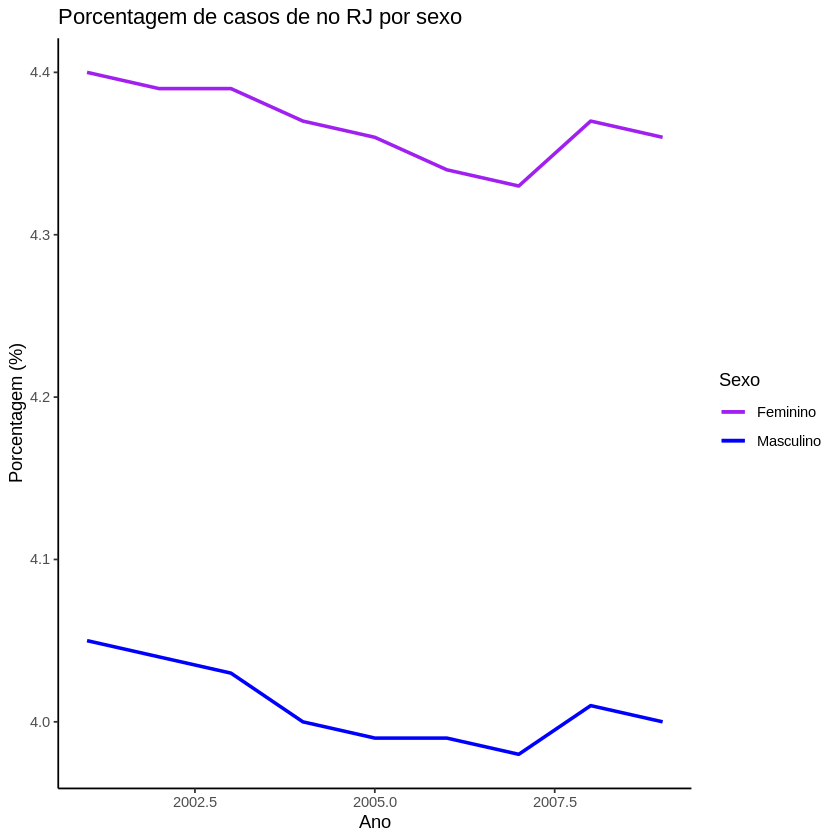

In [ ]:
library(ggplot2)

ggplot(porcentagens_rj, aes(x = Ano)) +
  geom_line(aes(y = `Porcentagem.feminina.no.RJ`, color = "Feminino"), size = 1) +
  geom_line(aes(y = `Porcentagem.masculina.no.RJ`, color = "Masculino"), size = 1) +
  scale_color_manual(values = c("Feminino" = "purple", "Masculino" = "blue")) +
  labs(title = "Porcentagem de casos de no RJ por sexo",
       y = "Porcentagem (%)",
       x = "Ano",
       color = "Sexo") +
  theme_classic()


# e) Faça um comparativo dos dados de São Paulo e Rio de Janeiro com relação ao número total de casos no Brasil e verifique sua evolução (com relação ao número total de casos e estes casos separados por sexo: feminino e masculino)

In [ ]:
#Faça um comparativo dos dados de São Paulo e Rio de Janeiro com relação ao número total de
# casos no Brasil :separados por sexo: feminino e masculin
totais_estado_sexo <- data.frame(
  Estado = rep(c("São Paulo", "Rio de Janeiro"), each = 2),
  Sexo = c("Feminino", "Masculino", "Feminino", "Masculino"),
  Casos = c(sum(dados$feminino_sp), sum(dados$masculino_sp), sum(dados$feminino_rj), sum(dados$masculino_rj))
)
totais_estado_sexo %>% mutate(Porcentagem = round((Casos/sum(Casos)) * 100, 2))
# Conseguimos observar que a maior parte dos dados estão no estado de São Paulo

Estado,Sexo,Casos,Porcentagem
<chr>,<chr>,<dbl>,<dbl>
São Paulo,Feminino,184253675,37.01
São Paulo,Masculino,175663529,35.28
Rio de Janeiro,Feminino,71928014,14.45
Rio de Janeiro,Masculino,66015843,13.26


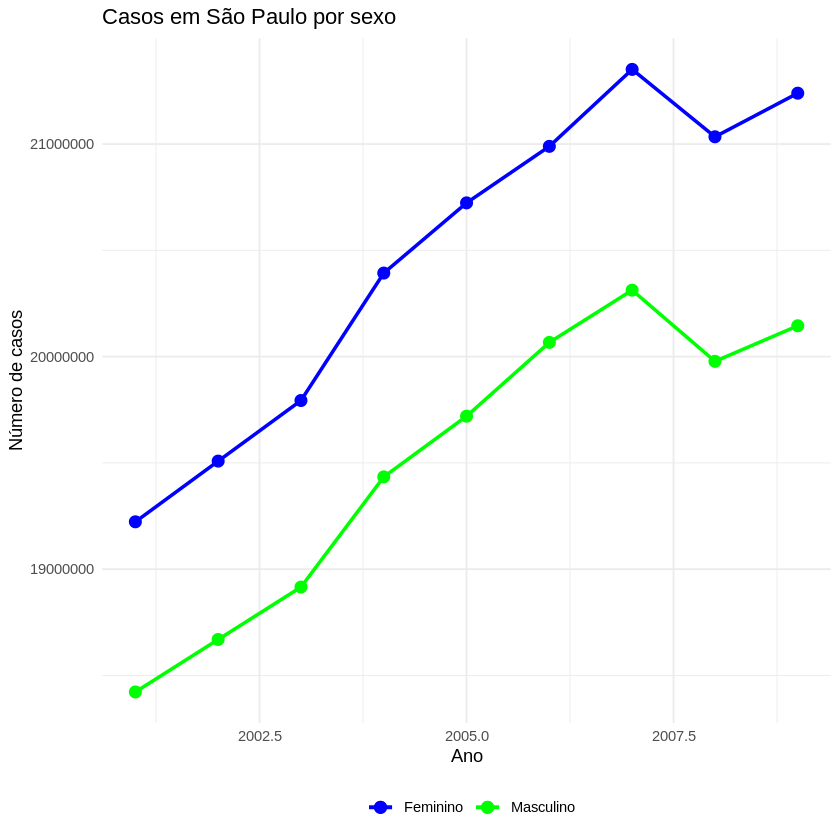

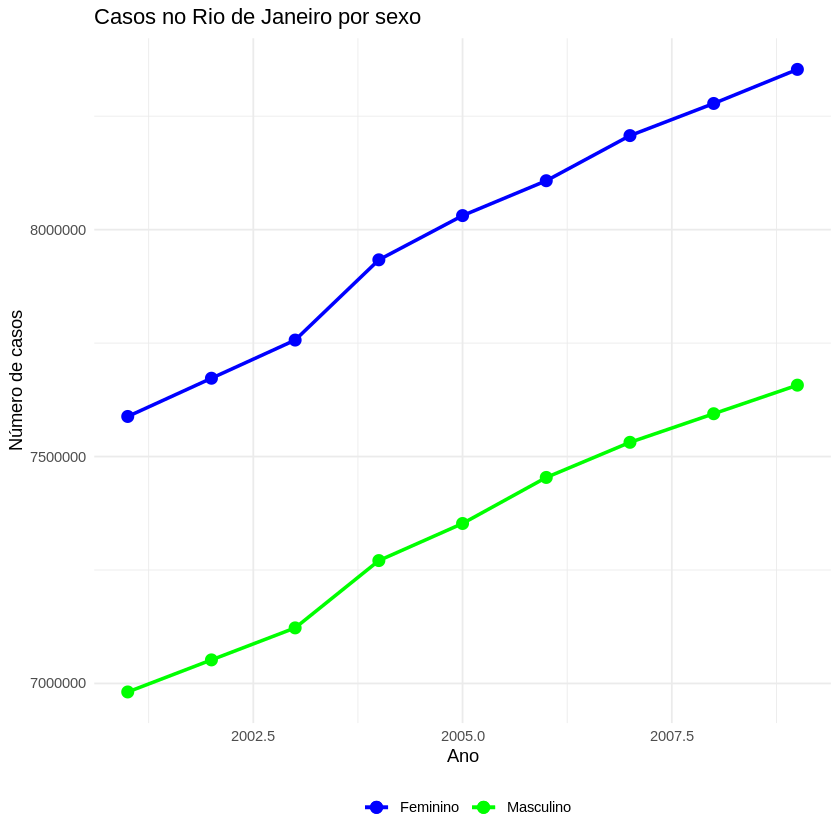

In [ ]:
# Gráfico para São Paulo
ggplot(dados, aes(x = Ano)) +
  geom_line(aes(y = feminino_sp, color = "Feminino"), size = 1) +
  geom_point(aes(y = feminino_sp, color = "Feminino"), size = 3) +
  geom_line(aes(y = masculino_sp, color = "Masculino"), size = 1) +
  geom_point(aes(y = masculino_sp, color = "Masculino"), size = 3) +
  labs(title = "Casos em São Paulo por sexo",
       x = "Ano", y = "Número de casos") +
  scale_color_manual(name = NULL,
                     values = c("Feminino" = "blue", "Masculino" = "green")) +
  theme_minimal() +
  theme(legend.position = "bottom")
# Existe uma evolução nos casos de São Paulo

# Gráfico para Rio de Janeiro
ggplot(dados, aes(x = Ano)) +
  geom_line(aes(y = feminino_rj, color = "Feminino"), size = 1) +
  geom_point(aes(y = feminino_rj, color = "Feminino"), size = 3) +
  geom_line(aes(y = masculino_rj, color = "Masculino"), size = 1) +
  geom_point(aes(y = masculino_rj, color = "Masculino"), size = 3) +
  labs(title = "Casos no Rio de Janeiro por sexo",
       x = "Ano", y = "Número de casos") +
  scale_color_manual(name = NULL,
                     values = c("Feminino" = "blue", "Masculino" = "green")) +
  theme_minimal() +
  theme(legend.position = "bottom")
# Existe uma evolução nos casos do Rio de Janeiro

# E) Faça um boxplot destes dados e faça uma análise comparativa.

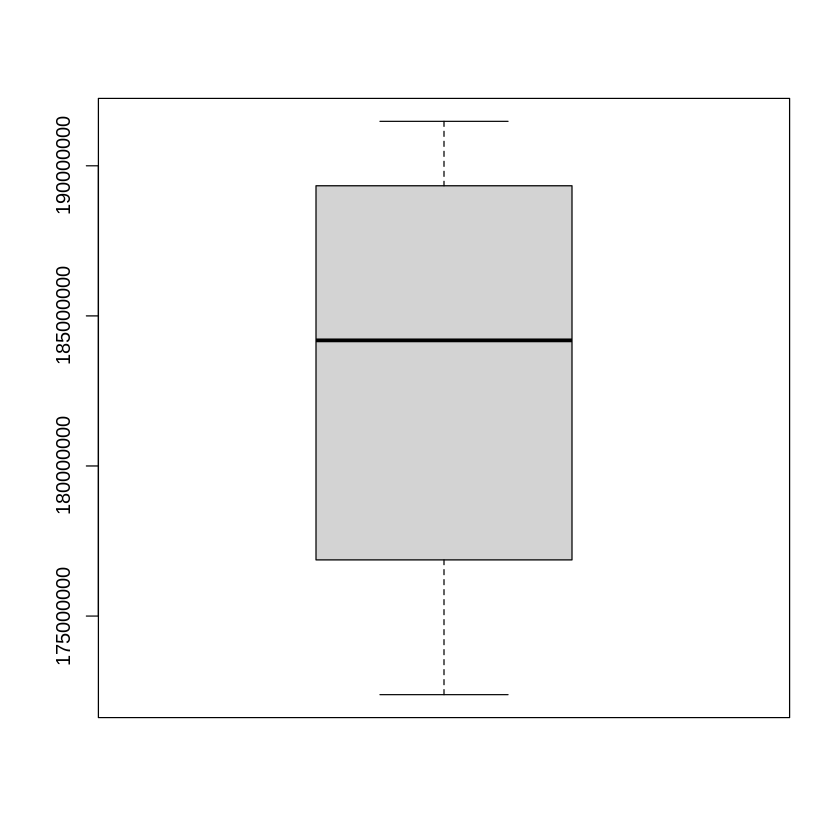

In [ ]:
# Faça um boxplot destes dados
boxplot(dados$soma_Brasil)

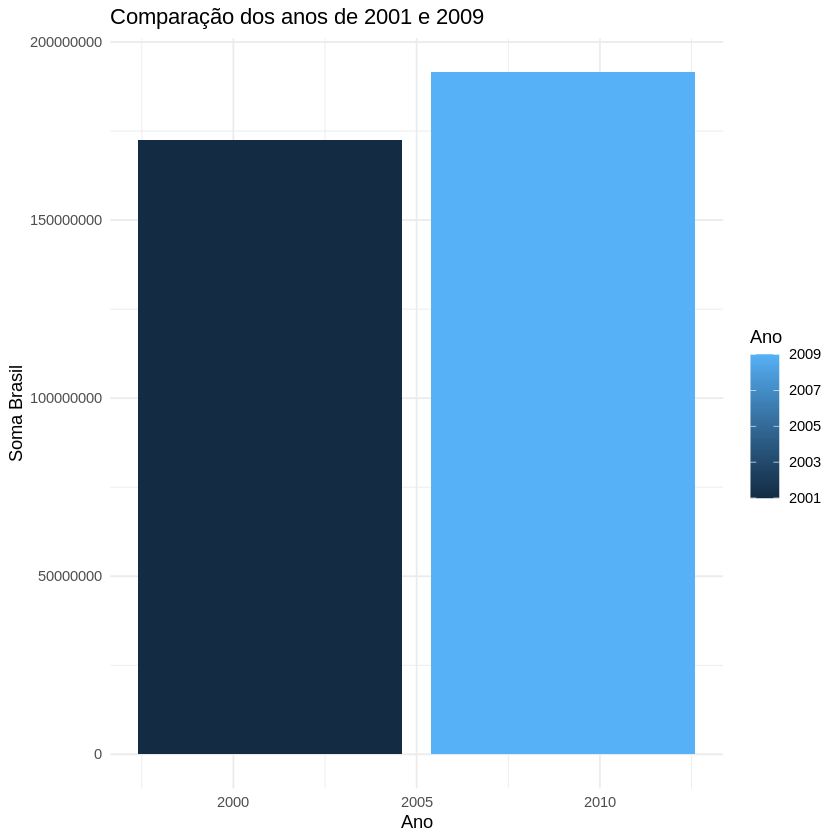

In [ ]:
#Faça uma análise comparativa.
# Selecionando apenas as colunas de interesse
dados_sel <- dados[, c("Ano", "soma_Brasil")]

# Filtrando apenas os anos de 2001 e 2009
dados_sel <- dados_sel[dados_sel$Ano %in% c(2001, 2009), ]

# Criando um gráfico de barras para comparar as duas variáveis
library(ggplot2)
ggplot(data = dados_sel, aes(x = Ano, y = soma_Brasil, fill = Ano)) + 
  geom_bar(stat = "identity", position = position_dodge()) + 
  labs(title = "Comparação dos anos de 2001 e 2009", 
       x = "Ano", y = "Soma Brasil") + 
  theme_minimal()


#g) Faça um dashboard com os dados obtidos para uma análise.

# 2) Os dados abaixo foram também extraídos do DATASUS com relação à doença: Hepatite C no Brasil e em São Paulo. Faça um estudo da evolução dos dados conforme tabela abaixo:

In [ ]:
# dataframe com os dados de hepatite
hepatite <- data.frame(
  ano = c(2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000),
  brasil_masculino = c(3620, 3414, 3522, 2926, 3752, 3743, 2759, 1997, 1193, 668),
  brasil_feminino = c(7391, 6196, 6197, 9473, 11107, 10651, 8482, 6720, 5838, 5293),
  total_brasil = c(11011, 9610, 9719, 12399, 14859, 14394, 11241, 8717, 7031, 5961),
  total_sao_paulo = c(6254, 5774, 5767, 4804, 6121, 6065, 4342, 2971, 1771, 1001),
  sao_paulo_masculino = c(3620, 3414, 3522, 2926, 3752, 3743, 2759, 1997, 1193, 668),
  sao_paulo_feminino = c(2634, 2360, 2245, 1878, 2369, 2322, 1583, 974, 578, 333)
)

# visualizar a base de dados
hepatite


ano,brasil_masculino,brasil_feminino,total_brasil,total_sao_paulo,sao_paulo_masculino,sao_paulo_feminino
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,3620,7391,11011,6254,3620,2634
2008,3414,6196,9610,5774,3414,2360
2007,3522,6197,9719,5767,3522,2245
2006,2926,9473,12399,4804,2926,1878
2005,3752,11107,14859,6121,3752,2369
2004,3743,10651,14394,6065,3743,2322
2003,2759,8482,11241,4342,2759,1583
2002,1997,6720,8717,2971,1997,974
2001,1193,5838,7031,1771,1193,578


# a) Verifique se há crescimento dos dados ou diminuição dos valores no período de 2000 a 2009. Faça um gráfico de dispersão dos dados

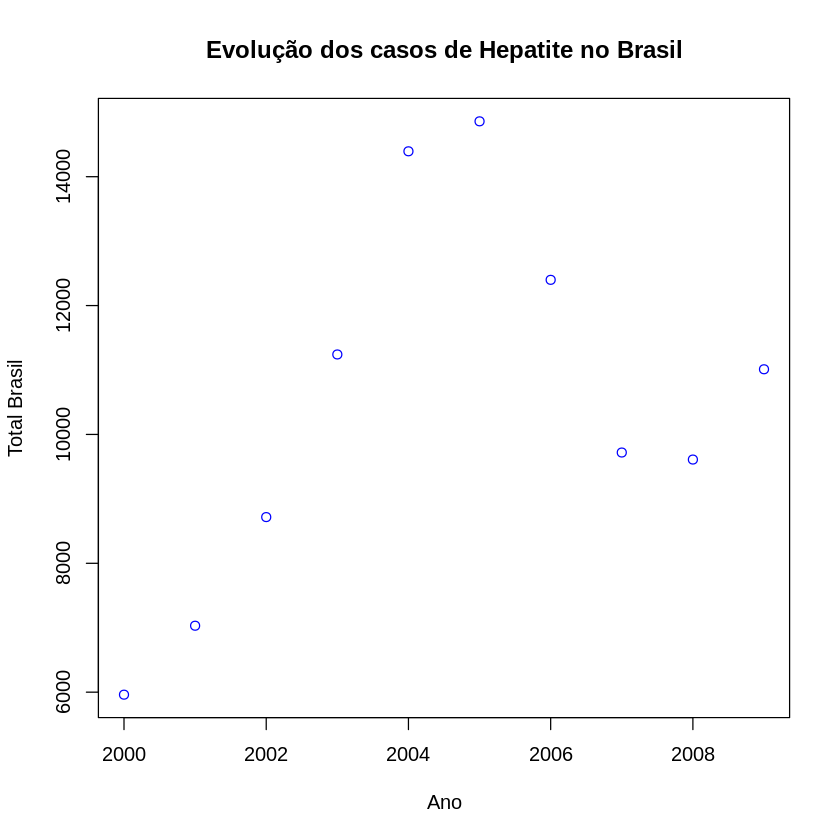

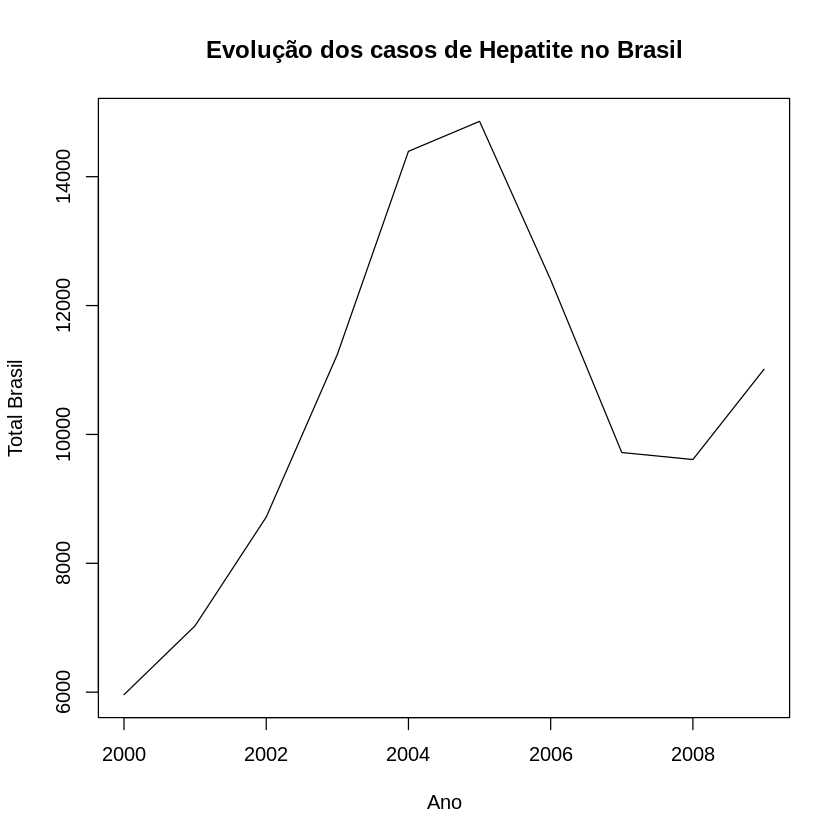

In [6]:
# criar um gráfico de dispersão para a variável total_brasil
plot(hepatite$ano, hepatite$total_brasil, type = "p", col = "blue", xlab = "Ano", 
ylab = "Total Brasil", main = "Evolução dos casos de Hepatite no Brasil")
# criar um gráfico de linha para a variável total_brasil
plot(hepatite$ano, hepatite$total_brasil, type = "l", xlab = "Ano",
 ylab = "Total Brasil", main = "Evolução dos casos de Hepatite no Brasil")

#Ao analisar ambos os gráficos, podemos perceber que há um aumento dos valores
# da variável total_brasil no período de 2000 a 2009, indicando um crescimento 
#dos casos de hepatite no Brasil nesse período.

# b) Faça um comparativo entre os dados de São Paulo e os dados do Brasil – tire a porcentagem entre estes valores por ano. Faça um gráfico de dispersão dos dados

In [15]:
# criar uma tabela com os valores e as porcentagens
#Faça um comparativo entre os dados de São Paulo e os dados do Brasil – 
# tire a porcentagem entre estes valores por ano
comparativo <- data.frame(ano = hepatite$ano,
                          total_sp = hepatite$total_sao_paulo,
                          total_brasil = hepatite$total_brasil,
                          pct_sp = round((hepatite$total_sao_paulo / hepatite$total_brasil) * 100, 2))
comparativo <- comparativo %>%
  arrange(ano)
comparativo

ano,total_sp,total_brasil,pct_sp
<dbl>,<dbl>,<dbl>,<dbl>
2000,1001,5961,16.79
2001,1771,7031,25.19
2002,2971,8717,34.08
2003,4342,11241,38.63
2004,6065,14394,42.14
2005,6121,14859,41.19
2006,4804,12399,38.75
2007,5767,9719,59.34
2008,5774,9610,60.08


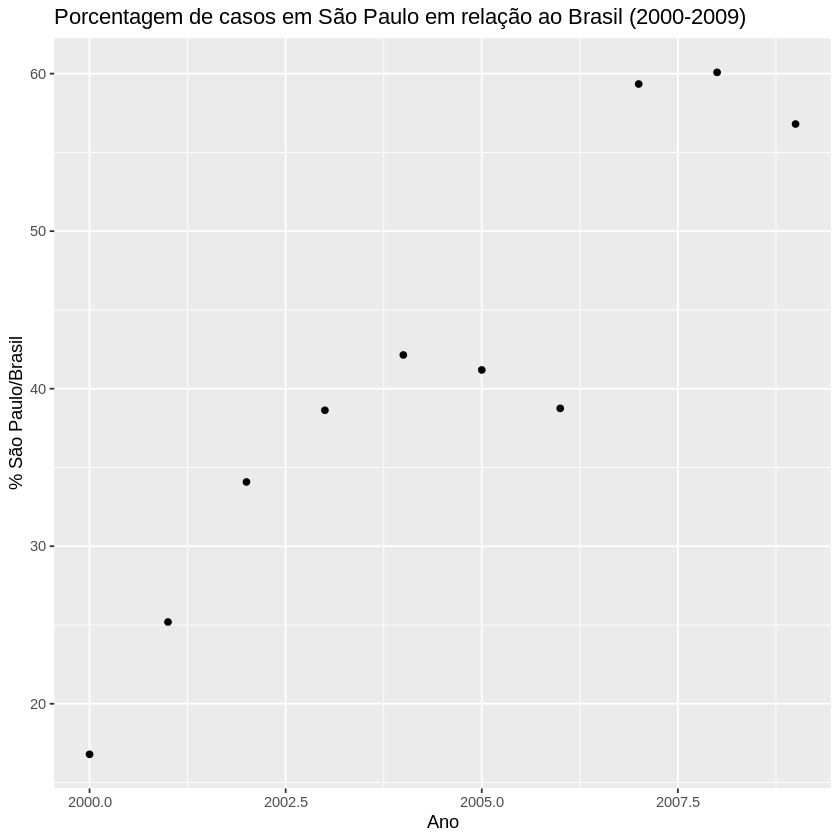

In [11]:
#Faça um gráfico de dispersão dos dados
ggplot(hepatite_porcentagem, aes(x = ano, y = porcentagem)) + 
  geom_point() + 
  labs(x = "Ano", y = "% São Paulo/Brasil", 
       title = "Porcentagem de casos em São Paulo em relação ao Brasil (2000-2009)")
